In [2]:
!pip install librosa


   ---------------------------------------- 0.0/260.7 kB ? eta -:--:--
   ------ -------------------------------- 41.0/260.7 kB 991.0 kB/s eta 0:00:01
   ----------------- ---------------------- 112.6/260.7 kB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 194.6/260.7 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 260.7/260.7 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 64.6/64.6 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---- ----------------------------------- 0.1/1.0 MB 2.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.2/1.0 MB 2.5 MB/s eta 0:00:01
   ------------- -------------------------- 0.3/1.0 MB 2.7 MB/s eta 0:00:01
   ------------------- -------------------- 0.5/1.0 MB 2.6 MB/s eta 0:00:01
   ------------------------ --------------- 0.6/1.0 MB 2.6 MB/s eta 0:00:01
   ---------

In [3]:
# 📦 Step 1: Imports & Setup
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [5]:
# 📂 Step 2: Load Data and Extract MFCCs

# Set your dataset path (update as per your location)
DATA_PATH = r"C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres"


# Parameters
SAMPLE_RATE = 22050  # Hz
DURATION = 30        # seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

def extract_features(file_path, n_mfcc=13, max_len=130):
    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    
    # Padding/truncating for consistency
    if mfccs.shape[1] < max_len:
        pad_width = max_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_len]
    
    return mfccs


In [6]:
# 📊 Step 3: Load all audio files and prepare dataset

genres = os.listdir(DATA_PATH)
features = []
labels = []

for genre in genres:
    genre_path = os.path.join(DATA_PATH, genre)
    if not os.path.isdir(genre_path): continue
    
    for file_name in tqdm(os.listdir(genre_path), desc=f"Processing {genre}"):
        if file_name.endswith(".wav"):
            file_path = os.path.join(genre_path, file_name)
            mfcc = extract_features(file_path)
            features.append(mfcc)
            labels.append(genre)

X = np.array(features)
y = np.array(labels)

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Processing rock: 100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]

Features shape: (0,)
Labels shape: (0,)


In [8]:
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = []
y = []

genres = os.listdir(DATA_PATH)

for genre in genres:
    genre_path = os.path.join(DATA_PATH, genre)
    if not os.path.isdir(genre_path):
        continue
    
    for file in tqdm(os.listdir(genre_path), desc=f"Processing {genre}"):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_path, file)
            try:
                mfcc = extract_features(file_path)
                X.append(mfcc)
                y.append(genre)
            except Exception as e:
                print(f"❌ Error processing {file_path}: {e}")


Processing rock: 100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]


In [11]:
X = np.array(X)
y = np.array(y)


In [13]:
print(f"Number of samples: {len(X)}")
print(f"Number of labels: {len(y)}")


Number of samples: 0
Number of labels: 0


In [14]:
print(os.listdir(os.path.join(DATA_PATH, "blues"))[:5])


['.ipynb_checkpoints', 'blues.00000.au', 'blues.00001.au', 'blues.00002.au', 'blues.00003.au']


In [17]:
import os
import numpy as np
from tqdm import tqdm

X = []
y = []

genres = os.listdir(DATA_PATH)

for genre in genres:
    genre_path = os.path.join(DATA_PATH, genre)
    if not os.path.isdir(genre_path):
        continue

    for file in tqdm(os.listdir(genre_path), desc=f"Processing {genre}"):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_path, file)
            try:
                mfcc = extract_features(file_path)
                X.append(mfcc)
                y.append(genre)
                print(f"✔️ Processed: {file_path}")
            except Exception as e:
                print(f"❌ Error processing {file_path}: {e}")


Processing rock: 100%|████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 99888.16it/s]


In [18]:
print(f"Total samples extracted: {len(X)}")
print(f"Total labels extracted: {len(y)}")


Total samples extracted: 0
Total labels extracted: 0


In [19]:
print(os.listdir(DATA_PATH))


['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [20]:
import os

genre_test_path = os.path.join(DATA_PATH, "blues")  # Try "blues" or another known genre
print(os.listdir(genre_test_path))


['.ipynb_checkpoints', 'blues.00000.au', 'blues.00001.au', 'blues.00002.au', 'blues.00003.au', 'blues.00004.au', 'blues.00005.au', 'blues.00006.au', 'blues.00007.au', 'blues.00008.au', 'blues.00009.au', 'blues.00010.au', 'blues.00011.au', 'blues.00012.au', 'blues.00013.au', 'blues.00014.au', 'blues.00015.au', 'blues.00016.au', 'blues.00017.au', 'blues.00018.au', 'blues.00019.au', 'blues.00020.au', 'blues.00021.au', 'blues.00022.au', 'blues.00023.au', 'blues.00024.au', 'blues.00025.au', 'blues.00026.au', 'blues.00027.au', 'blues.00028.au', 'blues.00029.au', 'blues.00030.au', 'blues.00031.au', 'blues.00032.au', 'blues.00033.au', 'blues.00034.au', 'blues.00035.au', 'blues.00036.au', 'blues.00037.au', 'blues.00038.au', 'blues.00039.au', 'blues.00040.au', 'blues.00041.au', 'blues.00042.au', 'blues.00043.au', 'blues.00044.au', 'blues.00045.au', 'blues.00046.au', 'blues.00047.au', 'blues.00048.au', 'blues.00049.au', 'blues.00050.au', 'blues.00051.au', 'blues.00052.au', 'blues.00053.au', 'blue

In [21]:
for genre in genres:
    genre_path = os.path.join(DATA_PATH, genre)
    if not os.path.isdir(genre_path):
        continue

    for file in tqdm(os.listdir(genre_path), desc=f"Processing {genre}"):
        if file.lower().endswith(('.wav', '.au')):
            file_path = os.path.join(genre_path, file)
            try:
                mfcc = extract_features(file_path)
                X.append(mfcc)
                y.append(genre)
                print(f"✔️ Processed: {file_path}")
            except Exception as e:
                print(f"❌ Error processing {file_path}: {e}")


Processing blues:   3%|█▉                                                              | 3/101 [00:30<14:46,  9.04s/it]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00000.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00001.au


Processing blues:   5%|███▏                                                            | 5/101 [00:31<06:00,  3.76s/it]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00002.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00003.au


Processing blues:   7%|████▍                                                           | 7/101 [00:31<02:46,  1.77s/it]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00004.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00005.au


Processing blues:   9%|█████▋                                                          | 9/101 [00:31<01:22,  1.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00006.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00007.au


Processing blues:  11%|██████▊                                                        | 11/101 [00:31<00:43,  2.05it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00008.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00009.au


Processing blues:  14%|████████▋                                                      | 14/101 [00:32<00:20,  4.21it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00010.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00011.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00012.au


Processing blues:  16%|█████████▉                                                     | 16/101 [00:32<00:14,  5.76it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00013.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00014.au


Processing blues:  18%|███████████▏                                                   | 18/101 [00:32<00:11,  6.97it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00015.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00016.au


Processing blues:  20%|████████████▍                                                  | 20/101 [00:32<00:10,  8.08it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00017.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00018.au


Processing blues:  22%|█████████████▋                                                 | 22/101 [00:33<00:09,  8.53it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00019.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00020.au


Processing blues:  24%|██████████████▉                                                | 24/101 [00:33<00:08,  8.78it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00021.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00022.au


Processing blues:  26%|████████████████▏                                              | 26/101 [00:33<00:08,  9.06it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00023.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00024.au


Processing blues:  28%|█████████████████▍                                             | 28/101 [00:33<00:08,  9.06it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00025.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00026.au


Processing blues:  30%|██████████████████▋                                            | 30/101 [00:33<00:07,  9.10it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00027.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00028.au


Processing blues:  32%|███████████████████▉                                           | 32/101 [00:34<00:07,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00029.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00030.au


Processing blues:  34%|█████████████████████▏                                         | 34/101 [00:34<00:07,  9.09it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00031.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00032.au


Processing blues:  37%|███████████████████████                                        | 37/101 [00:34<00:07,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00033.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00034.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00035.au


Processing blues:  39%|████████████████████████▎                                      | 39/101 [00:34<00:06,  9.17it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00036.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00037.au


Processing blues:  41%|█████████████████████████▌                                     | 41/101 [00:35<00:06,  9.22it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00038.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00039.au


Processing blues:  43%|██████████████████████████▊                                    | 43/101 [00:35<00:06,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00040.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00041.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00042.au


Processing blues:  46%|████████████████████████████▋                                  | 46/101 [00:35<00:06,  9.14it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00043.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00044.au


Processing blues:  48%|█████████████████████████████▉                                 | 48/101 [00:35<00:05,  9.08it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00045.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00046.au


Processing blues:  50%|███████████████████████████████▊                               | 51/101 [00:36<00:05,  9.11it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00047.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00048.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00049.au


Processing blues:  52%|█████████████████████████████████                              | 53/101 [00:36<00:05,  9.29it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00050.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00051.au


Processing blues:  54%|██████████████████████████████████▎                            | 55/101 [00:36<00:04,  9.31it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00052.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00053.au


Processing blues:  57%|████████████████████████████████████▏                          | 58/101 [00:36<00:04,  9.42it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00054.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00055.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00056.au


Processing blues:  60%|██████████████████████████████████████                         | 61/101 [00:37<00:04,  9.64it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00057.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00058.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00059.au


Processing blues:  62%|███████████████████████████████████████▎                       | 63/101 [00:37<00:04,  9.40it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00060.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00061.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00062.au


Processing blues:  65%|█████████████████████████████████████████▏                     | 66/101 [00:37<00:03,  9.47it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00063.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00064.au


Processing blues:  67%|██████████████████████████████████████████▍                    | 68/101 [00:38<00:03,  9.44it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00065.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00066.au


Processing blues:  70%|████████████████████████████████████████████▎                  | 71/101 [00:38<00:03,  9.21it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00067.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00068.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00069.au


Processing blues:  72%|█████████████████████████████████████████████▌                 | 73/101 [00:38<00:03,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00070.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00071.au


Processing blues:  74%|██████████████████████████████████████████████▊                | 75/101 [00:38<00:02,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00072.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00073.au


Processing blues:  76%|████████████████████████████████████████████████               | 77/101 [00:39<00:02,  9.08it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00074.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00075.au


Processing blues:  78%|█████████████████████████████████████████████████▎             | 79/101 [00:39<00:02,  9.24it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00076.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00077.au


Processing blues:  80%|██████████████████████████████████████████████████▌            | 81/101 [00:39<00:02,  9.03it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00078.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00079.au


Processing blues:  83%|████████████████████████████████████████████████████▍          | 84/101 [00:39<00:01,  9.25it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00080.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00081.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00082.au


Processing blues:  85%|█████████████████████████████████████████████████████▋         | 86/101 [00:40<00:01,  9.32it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00083.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00084.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00085.au


Processing blues:  88%|███████████████████████████████████████████████████████▌       | 89/101 [00:40<00:01,  9.37it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00086.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00087.au


Processing blues:  90%|████████████████████████████████████████████████████████▊      | 91/101 [00:40<00:01,  9.36it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00088.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00089.au


Processing blues:  92%|██████████████████████████████████████████████████████████     | 93/101 [00:40<00:00,  9.32it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00090.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00091.au


Processing blues:  94%|███████████████████████████████████████████████████████████▎   | 95/101 [00:40<00:00,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00092.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00093.au


Processing blues:  97%|█████████████████████████████████████████████████████████████▏ | 98/101 [00:41<00:00,  9.42it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00094.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00095.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00096.au


Processing blues:  99%|█████████████████████████████████████████████████████████████▍| 100/101 [00:41<00:00,  9.22it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00097.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00098.au


Processing blues: 100%|██████████████████████████████████████████████████████████████| 101/101 [00:41<00:00,  2.43it/s]


✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\blues\blues.00099.au


Processing classical:   1%|▌                                                           | 1/100 [00:00<00:10,  9.61it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00000.au


Processing classical:   2%|█▏                                                          | 2/100 [00:00<00:10,  9.29it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00001.au


Processing classical:   3%|█▊                                                          | 3/100 [00:00<00:10,  9.37it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00002.au


Processing classical:   5%|███                                                         | 5/100 [00:00<00:10,  9.26it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00003.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00004.au


Processing classical:   7%|████▏                                                       | 7/100 [00:00<00:10,  9.26it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00005.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00006.au


Processing classical:   9%|█████▍                                                      | 9/100 [00:00<00:09,  9.32it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00007.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00008.au


Processing classical:  11%|██████▍                                                    | 11/100 [00:01<00:09,  9.03it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00009.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00010.au


Processing classical:  13%|███████▋                                                   | 13/100 [00:01<00:09,  8.98it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00011.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00012.au


Processing classical:  15%|████████▊                                                  | 15/100 [00:01<00:09,  8.96it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00013.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00014.au


Processing classical:  17%|██████████                                                 | 17/100 [00:01<00:09,  9.04it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00015.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00016.au


Processing classical:  19%|███████████▏                                               | 19/100 [00:02<00:08,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00017.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00018.au


Processing classical:  21%|████████████▍                                              | 21/100 [00:02<00:08,  9.14it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00019.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00020.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00021.au


Processing classical:  24%|██████████████▏                                            | 24/100 [00:02<00:08,  9.34it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00022.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00023.au


Processing classical:  26%|███████████████▎                                           | 26/100 [00:02<00:08,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00024.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00025.au


Processing classical:  28%|████████████████▌                                          | 28/100 [00:03<00:07,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00026.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00027.au


Processing classical:  30%|█████████████████▋                                         | 30/100 [00:03<00:07,  8.87it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00028.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00029.au


Processing classical:  32%|██████████████████▉                                        | 32/100 [00:03<00:07,  8.97it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00030.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00031.au


Processing classical:  34%|████████████████████                                       | 34/100 [00:03<00:07,  9.04it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00032.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00033.au


Processing classical:  36%|█████████████████████▏                                     | 36/100 [00:03<00:07,  8.93it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00034.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00035.au


Processing classical:  38%|██████████████████████▍                                    | 38/100 [00:04<00:06,  8.92it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00036.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00037.au


Processing classical:  40%|███████████████████████▌                                   | 40/100 [00:04<00:06,  8.90it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00038.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00039.au


Processing classical:  42%|████████████████████████▊                                  | 42/100 [00:04<00:06,  9.05it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00040.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00041.au


Processing classical:  44%|█████████████████████████▉                                 | 44/100 [00:04<00:06,  8.96it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00042.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00043.au


Processing classical:  46%|███████████████████████████▏                               | 46/100 [00:05<00:05,  9.10it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00044.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00045.au


Processing classical:  48%|████████████████████████████▎                              | 48/100 [00:05<00:05,  8.91it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00046.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00047.au


Processing classical:  50%|█████████████████████████████▌                             | 50/100 [00:05<00:05,  9.11it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00048.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00049.au


Processing classical:  52%|██████████████████████████████▋                            | 52/100 [00:05<00:05,  9.10it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00050.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00051.au


Processing classical:  54%|███████████████████████████████▊                           | 54/100 [00:05<00:05,  8.90it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00052.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00053.au


Processing classical:  56%|█████████████████████████████████                          | 56/100 [00:06<00:04,  9.01it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00054.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00055.au


Processing classical:  58%|██████████████████████████████████▏                        | 58/100 [00:06<00:04,  8.95it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00056.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00057.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00058.au


Processing classical:  62%|████████████████████████████████████▌                      | 62/100 [00:06<00:04,  9.21it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00059.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00060.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00061.au


Processing classical:  64%|█████████████████████████████████████▊                     | 64/100 [00:07<00:03,  9.21it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00062.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00063.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00064.au


Processing classical:  67%|███████████████████████████████████████▌                   | 67/100 [00:07<00:03,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00065.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00066.au


Processing classical:  69%|████████████████████████████████████████▋                  | 69/100 [00:07<00:03,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00067.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00068.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00069.au


Processing classical:  73%|███████████████████████████████████████████                | 73/100 [00:08<00:02,  9.50it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00070.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00071.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00072.au


Processing classical:  76%|████████████████████████████████████████████▊              | 76/100 [00:08<00:02,  9.47it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00073.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00074.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00075.au


Processing classical:  78%|██████████████████████████████████████████████             | 78/100 [00:08<00:02,  9.38it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00076.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00077.au


Processing classical:  80%|███████████████████████████████████████████████▏           | 80/100 [00:08<00:02,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00078.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00079.au


Processing classical:  82%|████████████████████████████████████████████████▍          | 82/100 [00:09<00:02,  8.98it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00080.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00081.au


Processing classical:  84%|█████████████████████████████████████████████████▌         | 84/100 [00:09<00:01,  8.71it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00082.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00083.au


Processing classical:  85%|██████████████████████████████████████████████████▏        | 85/100 [00:09<00:01,  8.87it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00084.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00085.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00086.au


Processing classical:  89%|████████████████████████████████████████████████████▌      | 89/100 [00:09<00:01,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00087.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00088.au


Processing classical:  91%|█████████████████████████████████████████████████████▋     | 91/100 [00:09<00:00,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00089.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00090.au


Processing classical:  94%|███████████████████████████████████████████████████████▍   | 94/100 [00:10<00:00,  9.27it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00091.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00092.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00093.au


Processing classical:  96%|████████████████████████████████████████████████████████▋  | 96/100 [00:10<00:00,  9.04it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00094.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00095.au


Processing classical:  98%|█████████████████████████████████████████████████████████▊ | 98/100 [00:10<00:00,  9.07it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00096.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00097.au


Processing classical: 100%|██████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.10it/s]


✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00098.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\classical\classical.00099.au


Processing country:   2%|█▏                                                            | 2/100 [00:00<00:10,  9.14it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00000.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00001.au


Processing country:   4%|██▍                                                           | 4/100 [00:00<00:10,  9.22it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00002.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00003.au


Processing country:   6%|███▋                                                          | 6/100 [00:00<00:10,  9.22it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00004.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00005.au


Processing country:   8%|████▉                                                         | 8/100 [00:00<00:10,  9.05it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00006.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00007.au


Processing country:  10%|██████                                                       | 10/100 [00:01<00:09,  9.09it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00008.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00009.au


Processing country:  12%|███████▎                                                     | 12/100 [00:01<00:09,  9.07it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00010.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00011.au


Processing country:  14%|████████▌                                                    | 14/100 [00:01<00:09,  9.24it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00012.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00013.au


Processing country:  16%|█████████▊                                                   | 16/100 [00:01<00:09,  9.21it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00014.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00015.au


Processing country:  17%|██████████▎                                                  | 17/100 [00:01<00:09,  9.18it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00016.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00017.au


Processing country:  20%|████████████▏                                                | 20/100 [00:02<00:08,  9.22it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00018.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00019.au


Processing country:  22%|█████████████▍                                               | 22/100 [00:02<00:08,  9.09it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00020.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00021.au


Processing country:  24%|██████████████▋                                              | 24/100 [00:02<00:08,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00022.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00023.au


Processing country:  26%|███████████████▊                                             | 26/100 [00:02<00:08,  9.13it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00024.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00025.au


Processing country:  28%|█████████████████                                            | 28/100 [00:03<00:08,  8.98it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00026.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00027.au


Processing country:  30%|██████████████████▎                                          | 30/100 [00:03<00:07,  8.95it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00028.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00029.au


Processing country:  32%|███████████████████▌                                         | 32/100 [00:03<00:07,  8.89it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00030.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00031.au


Processing country:  34%|████████████████████▋                                        | 34/100 [00:03<00:07,  9.08it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00032.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00033.au


Processing country:  36%|█████████████████████▉                                       | 36/100 [00:03<00:07,  8.89it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00034.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00035.au


Processing country:  39%|███████████████████████▊                                     | 39/100 [00:04<00:06,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00036.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00037.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00038.au


Processing country:  41%|█████████████████████████                                    | 41/100 [00:04<00:06,  9.13it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00039.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00040.au


Processing country:  43%|██████████████████████████▏                                  | 43/100 [00:04<00:06,  9.20it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00041.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00042.au


Processing country:  45%|███████████████████████████▍                                 | 45/100 [00:04<00:06,  9.14it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00043.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00044.au


Processing country:  48%|█████████████████████████████▎                               | 48/100 [00:05<00:05,  9.32it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00045.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00046.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00047.au


Processing country:  50%|██████████████████████████████▌                              | 50/100 [00:05<00:05,  9.17it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00048.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00049.au


Processing country:  52%|███████████████████████████████▋                             | 52/100 [00:05<00:05,  9.10it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00050.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00051.au


Processing country:  54%|████████████████████████████████▉                            | 54/100 [00:05<00:05,  8.96it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00052.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00053.au


Processing country:  56%|██████████████████████████████████▏                          | 56/100 [00:06<00:04,  8.96it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00054.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00055.au


Processing country:  58%|███████████████████████████████████▍                         | 58/100 [00:06<00:04,  9.07it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00056.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00057.au


Processing country:  60%|████████████████████████████████████▌                        | 60/100 [00:06<00:04,  9.08it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00058.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00059.au


Processing country:  63%|██████████████████████████████████████▍                      | 63/100 [00:06<00:03,  9.39it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00060.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00061.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00062.au


Processing country:  65%|███████████████████████████████████████▋                     | 65/100 [00:07<00:03,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00063.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00064.au


Processing country:  67%|████████████████████████████████████████▊                    | 67/100 [00:07<00:03,  9.23it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00065.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00066.au


Processing country:  69%|██████████████████████████████████████████                   | 69/100 [00:07<00:03,  9.07it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00067.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00068.au


Processing country:  71%|███████████████████████████████████████████▎                 | 71/100 [00:07<00:03,  8.87it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00069.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00070.au


Processing country:  73%|████████████████████████████████████████████▌                | 73/100 [00:08<00:03,  8.94it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00071.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00072.au


Processing country:  75%|█████████████████████████████████████████████▊               | 75/100 [00:08<00:02,  8.85it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00073.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00074.au


Processing country:  77%|██████████████████████████████████████████████▉              | 77/100 [00:08<00:02,  8.91it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00075.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00076.au


Processing country:  79%|████████████████████████████████████████████████▏            | 79/100 [00:08<00:02,  8.97it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00077.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00078.au


Processing country:  81%|█████████████████████████████████████████████████▍           | 81/100 [00:08<00:02,  9.20it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00079.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00080.au


Processing country:  83%|██████████████████████████████████████████████████▋          | 83/100 [00:09<00:01,  9.20it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00081.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00082.au


Processing country:  86%|████████████████████████████████████████████████████▍        | 86/100 [00:09<00:01,  9.46it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00083.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00084.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00085.au


Processing country:  89%|██████████████████████████████████████████████████████▎      | 89/100 [00:09<00:01,  9.50it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00086.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00087.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00088.au


Processing country:  91%|███████████████████████████████████████████████████████▌     | 91/100 [00:09<00:00,  9.40it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00089.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00090.au


Processing country:  93%|████████████████████████████████████████████████████████▋    | 93/100 [00:10<00:00,  9.05it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00091.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00092.au


Processing country:  95%|█████████████████████████████████████████████████████████▉   | 95/100 [00:10<00:00,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00093.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00094.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00095.au


Processing country:  98%|███████████████████████████████████████████████████████████▊ | 98/100 [00:10<00:00,  9.40it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00096.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00097.au


Processing country: 100%|████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.13it/s]


✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00098.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\country\country.00099.au


Processing disco:   2%|█▎                                                              | 2/100 [00:00<00:10,  9.49it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00000.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00001.au


Processing disco:   4%|██▌                                                             | 4/100 [00:00<00:10,  9.45it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00002.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00003.au


Processing disco:   7%|████▍                                                           | 7/100 [00:00<00:09,  9.50it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00004.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00005.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00006.au


Processing disco:   9%|█████▊                                                          | 9/100 [00:00<00:09,  9.30it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00007.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00008.au


Processing disco:  11%|██████▉                                                        | 11/100 [00:01<00:09,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00009.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00010.au


Processing disco:  13%|████████▏                                                      | 13/100 [00:01<00:09,  9.17it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00011.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00012.au


Processing disco:  15%|█████████▍                                                     | 15/100 [00:01<00:09,  9.14it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00013.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00014.au


Processing disco:  17%|██████████▋                                                    | 17/100 [00:01<00:09,  8.85it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00015.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00016.au


Processing disco:  19%|███████████▉                                                   | 19/100 [00:02<00:09,  8.98it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00017.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00018.au


Processing disco:  21%|█████████████▏                                                 | 21/100 [00:02<00:08,  8.98it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00019.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00020.au


Processing disco:  23%|██████████████▍                                                | 23/100 [00:02<00:08,  9.24it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00021.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00022.au


Processing disco:  25%|███████████████▊                                               | 25/100 [00:02<00:08,  9.26it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00023.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00024.au


Processing disco:  27%|█████████████████                                              | 27/100 [00:02<00:07,  9.28it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00025.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00026.au


Processing disco:  29%|██████████████████▎                                            | 29/100 [00:03<00:07,  9.18it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00027.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00028.au


Processing disco:  31%|███████████████████▌                                           | 31/100 [00:03<00:07,  9.00it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00029.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00030.au


Processing disco:  33%|████████████████████▊                                          | 33/100 [00:03<00:07,  9.25it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00031.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00032.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00033.au


Processing disco:  36%|██████████████████████▋                                        | 36/100 [00:03<00:06,  9.30it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00034.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00035.au


Processing disco:  38%|███████████████████████▉                                       | 38/100 [00:04<00:06,  9.18it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00036.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00037.au


Processing disco:  40%|█████████████████████████▏                                     | 40/100 [00:04<00:06,  9.18it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00038.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00039.au


Processing disco:  43%|███████████████████████████                                    | 43/100 [00:04<00:05,  9.51it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00040.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00041.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00042.au


Processing disco:  45%|████████████████████████████▎                                  | 45/100 [00:04<00:06,  9.07it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00043.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00044.au


Processing disco:  47%|█████████████████████████████▌                                 | 47/100 [00:05<00:05,  9.22it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00045.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00046.au


Processing disco:  49%|██████████████████████████████▊                                | 49/100 [00:05<00:05,  8.94it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00047.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00048.au


Processing disco:  51%|████████████████████████████████▏                              | 51/100 [00:05<00:05,  9.00it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00049.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00050.au


Processing disco:  53%|█████████████████████████████████▍                             | 53/100 [00:05<00:05,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00051.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00052.au


Processing disco:  55%|██████████████████████████████████▋                            | 55/100 [00:05<00:04,  9.13it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00053.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00054.au


Processing disco:  58%|████████████████████████████████████▌                          | 58/100 [00:06<00:03, 11.00it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00055.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00056.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00057.au


Processing disco:  60%|█████████████████████████████████████▊                         | 60/100 [00:06<00:03, 10.76it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00058.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00059.au


Processing disco:  62%|███████████████████████████████████████                        | 62/100 [00:06<00:03, 10.18it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00060.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00061.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00062.au


Processing disco:  66%|█████████████████████████████████████████▌                     | 66/100 [00:07<00:03,  9.80it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00063.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00064.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00065.au


Processing disco:  68%|██████████████████████████████████████████▊                    | 68/100 [00:07<00:03,  9.63it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00066.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00067.au


Processing disco:  70%|████████████████████████████████████████████                   | 70/100 [00:07<00:03,  9.42it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00068.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00069.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00070.au


Processing disco:  73%|█████████████████████████████████████████████▉                 | 73/100 [00:07<00:02,  9.55it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00071.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00072.au


Processing disco:  76%|███████████████████████████████████████████████▉               | 76/100 [00:08<00:02,  9.43it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00073.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00074.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00075.au


Processing disco:  78%|█████████████████████████████████████████████████▏             | 78/100 [00:08<00:02,  9.33it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00076.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00077.au


Processing disco:  81%|███████████████████████████████████████████████████            | 81/100 [00:08<00:02,  9.26it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00078.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00079.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00080.au


Processing disco:  84%|████████████████████████████████████████████████████▉          | 84/100 [00:08<00:01,  9.22it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00081.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00082.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00083.au


Processing disco:  86%|██████████████████████████████████████████████████████▏        | 86/100 [00:09<00:01,  9.22it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00084.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00085.au


Processing disco:  88%|███████████████████████████████████████████████████████▍       | 88/100 [00:09<00:01,  8.99it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00086.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00087.au


Processing disco:  90%|████████████████████████████████████████████████████████▋      | 90/100 [00:09<00:01,  8.61it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00088.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00089.au


Processing disco:  92%|█████████████████████████████████████████████████████████▉     | 92/100 [00:09<00:00,  8.85it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00090.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00091.au


Processing disco:  94%|███████████████████████████████████████████████████████████▏   | 94/100 [00:10<00:00,  8.81it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00092.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00093.au


Processing disco:  96%|████████████████████████████████████████████████████████████▍  | 96/100 [00:10<00:00,  9.09it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00094.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00095.au


Processing disco:  98%|█████████████████████████████████████████████████████████████▋ | 98/100 [00:10<00:00,  9.27it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00096.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00097.au


Processing disco: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.28it/s]


✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00098.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\disco\disco.00099.au


Processing hiphop:   3%|█▉                                                             | 3/100 [00:00<00:10,  9.40it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00000.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00001.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00002.au


Processing hiphop:   6%|███▊                                                           | 6/100 [00:00<00:10,  9.34it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00003.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00004.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00005.au


Processing hiphop:   8%|█████                                                          | 8/100 [00:00<00:09,  9.32it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00006.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00007.au


Processing hiphop:  10%|██████▏                                                       | 10/100 [00:01<00:09,  9.37it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00008.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00009.au


Processing hiphop:  12%|███████▍                                                      | 12/100 [00:01<00:09,  9.33it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00010.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00011.au


Processing hiphop:  14%|████████▋                                                     | 14/100 [00:01<00:09,  9.34it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00012.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00013.au


Processing hiphop:  17%|██████████▌                                                   | 17/100 [00:01<00:09,  9.19it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00014.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00015.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00016.au


Processing hiphop:  20%|████████████▍                                                 | 20/100 [00:02<00:08,  9.67it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00017.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00018.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00019.au


Processing hiphop:  22%|█████████████▋                                                | 22/100 [00:02<00:07,  9.80it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00020.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00021.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00022.au


Processing hiphop:  25%|███████████████▌                                              | 25/100 [00:02<00:07,  9.69it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00023.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00024.au


Processing hiphop:  27%|████████████████▋                                             | 27/100 [00:02<00:07,  9.39it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00025.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00026.au


Processing hiphop:  29%|█████████████████▉                                            | 29/100 [00:03<00:07,  9.37it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00027.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00028.au


Processing hiphop:  31%|███████████████████▏                                          | 31/100 [00:03<00:07,  9.17it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00029.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00030.au


Processing hiphop:  33%|████████████████████▍                                         | 33/100 [00:03<00:07,  9.19it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00031.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00032.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00033.au


Processing hiphop:  36%|██████████████████████▎                                       | 36/100 [00:03<00:06,  9.55it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00034.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00035.au


Processing hiphop:  38%|███████████████████████▌                                      | 38/100 [00:04<00:06,  9.46it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00036.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00037.au


Processing hiphop:  41%|█████████████████████████▍                                    | 41/100 [00:04<00:06,  9.29it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00038.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00039.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00040.au


Processing hiphop:  43%|██████████████████████████▋                                   | 43/100 [00:04<00:06,  9.32it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00041.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00042.au


Processing hiphop:  45%|███████████████████████████▉                                  | 45/100 [00:04<00:05,  9.40it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00043.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00044.au


Processing hiphop:  48%|█████████████████████████████▊                                | 48/100 [00:05<00:05,  9.59it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00045.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00046.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00047.au


Processing hiphop:  50%|███████████████████████████████                               | 50/100 [00:05<00:05,  9.56it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00048.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00049.au


Processing hiphop:  53%|████████████████████████████████▊                             | 53/100 [00:05<00:04,  9.50it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00050.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00051.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00052.au


Processing hiphop:  55%|██████████████████████████████████                            | 55/100 [00:05<00:04,  9.37it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00053.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00054.au


Processing hiphop:  57%|███████████████████████████████████▎                          | 57/100 [00:06<00:04,  9.19it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00055.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00056.au


Processing hiphop:  59%|████████████████████████████████████▌                         | 59/100 [00:06<00:04,  9.07it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00057.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00058.au


Processing hiphop:  61%|█████████████████████████████████████▊                        | 61/100 [00:06<00:04,  8.92it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00059.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00060.au


Processing hiphop:  63%|███████████████████████████████████████                       | 63/100 [00:06<00:04,  9.10it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00061.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00062.au


Processing hiphop:  65%|████████████████████████████████████████▎                     | 65/100 [00:06<00:03,  8.98it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00063.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00064.au


Processing hiphop:  67%|█████████████████████████████████████████▌                    | 67/100 [00:07<00:03,  9.08it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00065.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00066.au


Processing hiphop:  69%|██████████████████████████████████████████▊                   | 69/100 [00:07<00:03,  9.17it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00067.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00068.au


Processing hiphop:  71%|████████████████████████████████████████████                  | 71/100 [00:07<00:03,  9.21it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00069.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00070.au


Processing hiphop:  73%|█████████████████████████████████████████████▎                | 73/100 [00:07<00:02,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00071.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00072.au


Processing hiphop:  75%|██████████████████████████████████████████████▌               | 75/100 [00:08<00:02,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00073.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00074.au


Processing hiphop:  77%|███████████████████████████████████████████████▋              | 77/100 [00:08<00:02,  9.05it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00075.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00076.au


Processing hiphop:  79%|████████████████████████████████████████████████▉             | 79/100 [00:08<00:02,  8.88it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00077.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00078.au


Processing hiphop:  82%|██████████████████████████████████████████████████▊           | 82/100 [00:08<00:02,  8.91it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00079.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00080.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00081.au


Processing hiphop:  84%|████████████████████████████████████████████████████          | 84/100 [00:09<00:01,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00082.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00083.au


Processing hiphop:  86%|█████████████████████████████████████████████████████▎        | 86/100 [00:09<00:01,  9.03it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00084.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00085.au


Processing hiphop:  88%|██████████████████████████████████████████████████████▌       | 88/100 [00:09<00:01,  8.99it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00086.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00087.au


Processing hiphop:  90%|███████████████████████████████████████████████████████▊      | 90/100 [00:09<00:01,  9.20it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00088.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00089.au


Processing hiphop:  92%|█████████████████████████████████████████████████████████     | 92/100 [00:09<00:00,  9.08it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00090.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00091.au


Processing hiphop:  94%|██████████████████████████████████████████████████████████▎   | 94/100 [00:10<00:00,  9.09it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00092.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00093.au


Processing hiphop:  96%|███████████████████████████████████████████████████████████▌  | 96/100 [00:10<00:00,  9.21it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00094.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00095.au


Processing hiphop:  98%|████████████████████████████████████████████████████████████▊ | 98/100 [00:10<00:00,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00096.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00097.au


Processing hiphop: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.24it/s]


✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00098.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\hiphop\hiphop.00099.au


Processing jazz:   2%|█▎                                                               | 2/100 [00:00<00:10,  8.94it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00000.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00001.au


Processing jazz:   4%|██▌                                                              | 4/100 [00:00<00:10,  8.95it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00002.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00003.au


Processing jazz:   6%|███▉                                                             | 6/100 [00:00<00:10,  8.92it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00004.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00005.au


Processing jazz:   8%|█████▏                                                           | 8/100 [00:00<00:10,  9.09it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00006.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00007.au


Processing jazz:  10%|██████▍                                                         | 10/100 [00:01<00:09,  9.29it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00008.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00009.au


Processing jazz:  12%|███████▋                                                        | 12/100 [00:01<00:09,  9.23it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00010.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00011.au


Processing jazz:  14%|████████▉                                                       | 14/100 [00:01<00:09,  8.93it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00012.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00013.au


Processing jazz:  17%|██████████▉                                                     | 17/100 [00:01<00:09,  9.02it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00014.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00015.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00016.au


Processing jazz:  19%|████████████▏                                                   | 19/100 [00:02<00:09,  8.98it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00017.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00018.au


Processing jazz:  21%|█████████████▍                                                  | 21/100 [00:02<00:08,  9.06it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00019.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00020.au


Processing jazz:  23%|██████████████▋                                                 | 23/100 [00:02<00:08,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00021.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00022.au


Processing jazz:  25%|████████████████                                                | 25/100 [00:02<00:08,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00023.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00024.au


Processing jazz:  27%|█████████████████▎                                              | 27/100 [00:02<00:08,  8.96it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00025.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00026.au


Processing jazz:  29%|██████████████████▌                                             | 29/100 [00:03<00:07,  8.97it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00027.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00028.au


Processing jazz:  31%|███████████████████▊                                            | 31/100 [00:03<00:07,  8.98it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00029.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00030.au


Processing jazz:  34%|█████████████████████▊                                          | 34/100 [00:03<00:07,  9.24it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00031.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00032.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00033.au


Processing jazz:  37%|███████████████████████▋                                        | 37/100 [00:04<00:06,  9.41it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00034.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00035.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00036.au


Processing jazz:  39%|████████████████████████▉                                       | 39/100 [00:04<00:06,  9.35it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00037.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00038.au


Processing jazz:  41%|██████████████████████████▏                                     | 41/100 [00:04<00:06,  9.17it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00039.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00040.au


Processing jazz:  43%|███████████████████████████▌                                    | 43/100 [00:04<00:06,  8.90it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00041.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00042.au


Processing jazz:  45%|████████████████████████████▊                                   | 45/100 [00:04<00:06,  8.95it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00043.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00044.au


Processing jazz:  47%|██████████████████████████████                                  | 47/100 [00:05<00:05,  9.08it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00045.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00046.au


Processing jazz:  49%|███████████████████████████████▎                                | 49/100 [00:05<00:05,  9.11it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00047.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00048.au


Processing jazz:  51%|████████████████████████████████▋                               | 51/100 [00:05<00:05,  8.94it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00049.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00050.au


Processing jazz:  53%|█████████████████████████████████▉                              | 53/100 [00:05<00:05,  8.96it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00051.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00052.au


Processing jazz:  55%|███████████████████████████████████▏                            | 55/100 [00:06<00:05,  8.88it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00053.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00054.au


Processing jazz:  57%|████████████████████████████████████▍                           | 57/100 [00:06<00:04,  9.02it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00055.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00056.au


Processing jazz:  59%|█████████████████████████████████████▊                          | 59/100 [00:06<00:04,  8.99it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00057.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00058.au


Processing jazz:  61%|███████████████████████████████████████                         | 61/100 [00:06<00:04,  8.90it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00059.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00060.au


Processing jazz:  63%|████████████████████████████████████████▎                       | 63/100 [00:06<00:04,  9.09it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00061.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00062.au


Processing jazz:  65%|█████████████████████████████████████████▌                      | 65/100 [00:07<00:03,  8.96it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00063.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00064.au


Processing jazz:  67%|██████████████████████████████████████████▉                     | 67/100 [00:07<00:03,  9.02it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00065.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00066.au


Processing jazz:  69%|████████████████████████████████████████████▏                   | 69/100 [00:07<00:03,  8.99it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00067.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00068.au


Processing jazz:  71%|█████████████████████████████████████████████▍                  | 71/100 [00:07<00:03,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00069.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00070.au


Processing jazz:  73%|██████████████████████████████████████████████▋                 | 73/100 [00:08<00:02,  9.04it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00071.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00072.au


Processing jazz:  75%|████████████████████████████████████████████████                | 75/100 [00:08<00:02,  8.98it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00073.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00074.au


Processing jazz:  77%|█████████████████████████████████████████████████▎              | 77/100 [00:08<00:02,  8.90it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00075.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00076.au


Processing jazz:  79%|██████████████████████████████████████████████████▌             | 79/100 [00:08<00:02,  9.20it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00077.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00078.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00079.au


Processing jazz:  82%|████████████████████████████████████████████████████▍           | 82/100 [00:09<00:01,  9.23it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00080.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00081.au


Processing jazz:  84%|█████████████████████████████████████████████████████▊          | 84/100 [00:09<00:01,  9.04it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00082.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00083.au


Processing jazz:  86%|███████████████████████████████████████████████████████         | 86/100 [00:09<00:01,  9.23it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00084.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00085.au


Processing jazz:  88%|████████████████████████████████████████████████████████▎       | 88/100 [00:09<00:01,  9.27it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00086.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00087.au


Processing jazz:  91%|██████████████████████████████████████████████████████████▏     | 91/100 [00:10<00:00,  9.51it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00088.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00089.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00090.au


Processing jazz:  93%|███████████████████████████████████████████████████████████▌    | 93/100 [00:10<00:00,  9.60it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00091.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00092.au


Processing jazz:  95%|████████████████████████████████████████████████████████████▊   | 95/100 [00:10<00:00,  9.45it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00093.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00094.au


Processing jazz:  97%|██████████████████████████████████████████████████████████████  | 97/100 [00:10<00:00,  9.30it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00095.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00096.au


Processing jazz:  99%|███████████████████████████████████████████████████████████████▎| 99/100 [00:10<00:00,  9.27it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00097.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00098.au


Processing jazz: 100%|███████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.10it/s]


✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\jazz\jazz.00099.au


Processing metal:   0%|                                                                        | 0/100 [00:00<?, ?it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00000.au


Processing metal:   2%|█▎                                                              | 2/100 [00:00<00:10,  9.49it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00001.au


Processing metal:   3%|█▉                                                              | 3/100 [00:00<00:10,  9.29it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00002.au


Processing metal:   4%|██▌                                                             | 4/100 [00:00<00:10,  9.02it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00003.au


Processing metal:   5%|███▏                                                            | 5/100 [00:00<00:10,  8.84it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00004.au


Processing metal:   6%|███▊                                                            | 6/100 [00:00<00:10,  8.97it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00005.au


Processing metal:   8%|█████                                                           | 8/100 [00:00<00:10,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00006.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00007.au


Processing metal:  10%|██████▎                                                        | 10/100 [00:01<00:09,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00008.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00009.au


Processing metal:  12%|███████▌                                                       | 12/100 [00:01<00:09,  9.13it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00010.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00011.au


Processing metal:  14%|████████▊                                                      | 14/100 [00:01<00:09,  9.13it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00012.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00013.au


Processing metal:  17%|██████████▋                                                    | 17/100 [00:01<00:08,  9.32it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00014.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00015.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00016.au


Processing metal:  20%|████████████▌                                                  | 20/100 [00:02<00:08,  9.20it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00017.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00018.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00019.au


Processing metal:  23%|██████████████▍                                                | 23/100 [00:02<00:08,  9.11it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00020.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00021.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00022.au


Processing metal:  25%|███████████████▊                                               | 25/100 [00:02<00:08,  9.09it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00023.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00024.au


Processing metal:  27%|█████████████████                                              | 27/100 [00:02<00:07,  9.21it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00025.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00026.au


Processing metal:  29%|██████████████████▎                                            | 29/100 [00:03<00:07,  9.17it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00027.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00028.au


Processing metal:  31%|███████████████████▌                                           | 31/100 [00:03<00:07,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00029.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00030.au


Processing metal:  33%|████████████████████▊                                          | 33/100 [00:03<00:07,  9.17it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00031.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00032.au


Processing metal:  35%|██████████████████████                                         | 35/100 [00:03<00:07,  9.04it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00033.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00034.au


Processing metal:  38%|███████████████████████▉                                       | 38/100 [00:04<00:06,  9.48it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00035.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00036.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00037.au


Processing metal:  40%|█████████████████████████▏                                     | 40/100 [00:04<00:06,  9.69it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00038.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00039.au


Processing metal:  42%|██████████████████████████▍                                    | 42/100 [00:04<00:06,  9.23it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00040.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00041.au


Processing metal:  44%|███████████████████████████▋                                   | 44/100 [00:04<00:05,  9.37it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00042.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00043.au


Processing metal:  46%|████████████████████████████▉                                  | 46/100 [00:05<00:05,  9.31it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00044.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00045.au


Processing metal:  48%|██████████████████████████████▏                                | 48/100 [00:05<00:05,  9.31it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00046.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00047.au


Processing metal:  51%|████████████████████████████████▏                              | 51/100 [00:05<00:05,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00048.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00049.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00050.au


Processing metal:  53%|█████████████████████████████████▍                             | 53/100 [00:05<00:05,  9.18it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00051.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00052.au


Processing metal:  56%|███████████████████████████████████▎                           | 56/100 [00:06<00:04,  9.36it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00053.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00054.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00055.au


Processing metal:  59%|█████████████████████████████████████▏                         | 59/100 [00:06<00:04,  9.26it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00056.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00057.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00058.au


Processing metal:  61%|██████████████████████████████████████▍                        | 61/100 [00:06<00:04,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00059.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00060.au


Processing metal:  63%|███████████████████████████████████████▋                       | 63/100 [00:06<00:04,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00061.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00062.au


Processing metal:  65%|████████████████████████████████████████▉                      | 65/100 [00:07<00:03,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00063.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00064.au


Processing metal:  67%|██████████████████████████████████████████▏                    | 67/100 [00:07<00:03,  8.96it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00065.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00066.au


Processing metal:  69%|███████████████████████████████████████████▍                   | 69/100 [00:07<00:03,  9.02it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00067.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00068.au


Processing metal:  72%|█████████████████████████████████████████████▎                 | 72/100 [00:07<00:03,  9.05it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00069.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00070.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00071.au


Processing metal:  74%|██████████████████████████████████████████████▌                | 74/100 [00:08<00:02,  8.87it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00072.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00073.au


Processing metal:  76%|███████████████████████████████████████████████▉               | 76/100 [00:08<00:02,  8.87it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00074.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00075.au


Processing metal:  78%|█████████████████████████████████████████████████▏             | 78/100 [00:08<00:02,  8.76it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00076.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00077.au


Processing metal:  81%|███████████████████████████████████████████████████            | 81/100 [00:08<00:02,  9.09it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00078.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00079.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00080.au


Processing metal:  83%|████████████████████████████████████████████████████▎          | 83/100 [00:09<00:01,  9.11it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00081.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00082.au


Processing metal:  85%|█████████████████████████████████████████████████████▌         | 85/100 [00:09<00:01,  8.94it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00083.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00084.au


Processing metal:  87%|██████████████████████████████████████████████████████▊        | 87/100 [00:09<00:01,  8.85it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00085.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00086.au


Processing metal:  89%|████████████████████████████████████████████████████████       | 89/100 [00:09<00:01,  8.94it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00087.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00088.au


Processing metal:  91%|█████████████████████████████████████████████████████████▎     | 91/100 [00:09<00:00,  9.06it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00089.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00090.au


Processing metal:  93%|██████████████████████████████████████████████████████████▌    | 93/100 [00:10<00:00,  9.10it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00091.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00092.au


Processing metal:  95%|███████████████████████████████████████████████████████████▊   | 95/100 [00:10<00:00,  8.96it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00093.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00094.au


Processing metal:  97%|█████████████████████████████████████████████████████████████  | 97/100 [00:10<00:00,  9.07it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00095.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00096.au


Processing metal: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00097.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00098.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00099.au


Processing pop:   2%|█▎                                                                | 2/100 [00:00<00:10,  9.47it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00000.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00001.au


Processing pop:   4%|██▋                                                               | 4/100 [00:00<00:10,  8.92it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00002.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00003.au


Processing pop:   6%|███▉                                                              | 6/100 [00:00<00:11,  8.46it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00004.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00005.au


Processing pop:   8%|█████▎                                                            | 8/100 [00:00<00:10,  8.98it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00006.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00007.au


Processing pop:  10%|██████▌                                                          | 10/100 [00:01<00:09,  9.17it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00008.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00009.au


Processing pop:  12%|███████▊                                                         | 12/100 [00:01<00:09,  9.06it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00010.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00011.au


Processing pop:  14%|█████████                                                        | 14/100 [00:01<00:09,  9.03it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00012.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00013.au


Processing pop:  16%|██████████▍                                                      | 16/100 [00:01<00:09,  8.86it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00014.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00015.au


Processing pop:  18%|███████████▋                                                     | 18/100 [00:02<00:09,  9.02it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00016.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00017.au


Processing pop:  20%|█████████████                                                    | 20/100 [00:02<00:08,  9.18it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00018.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00019.au


Processing pop:  22%|██████████████▎                                                  | 22/100 [00:02<00:08,  9.34it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00020.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00021.au


Processing pop:  24%|███████████████▌                                                 | 24/100 [00:02<00:08,  9.04it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00022.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00023.au


Processing pop:  27%|█████████████████▌                                               | 27/100 [00:02<00:07,  9.23it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00024.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00025.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00026.au


Processing pop:  29%|██████████████████▊                                              | 29/100 [00:03<00:07,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00027.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00028.au


Processing pop:  31%|████████████████████▏                                            | 31/100 [00:03<00:07,  9.14it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00029.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00030.au


Processing pop:  33%|█████████████████████▍                                           | 33/100 [00:03<00:07,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00031.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00032.au


Processing pop:  35%|██████████████████████▊                                          | 35/100 [00:03<00:07,  9.07it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00033.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00034.au


Processing pop:  37%|████████████████████████                                         | 37/100 [00:04<00:06,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00035.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00036.au


Processing pop:  39%|█████████████████████████▎                                       | 39/100 [00:04<00:06,  9.04it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00037.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00038.au


Processing pop:  41%|██████████████████████████▋                                      | 41/100 [00:04<00:06,  9.09it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00039.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00040.au


Processing pop:  43%|███████████████████████████▉                                     | 43/100 [00:04<00:06,  9.02it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00041.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00042.au


Processing pop:  45%|█████████████████████████████▎                                   | 45/100 [00:04<00:06,  8.87it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00043.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00044.au


Processing pop:  47%|██████████████████████████████▌                                  | 47/100 [00:05<00:05,  9.00it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00045.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00046.au


Processing pop:  49%|███████████████████████████████▊                                 | 49/100 [00:05<00:05,  8.97it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00047.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00048.au


Processing pop:  51%|█████████████████████████████████▏                               | 51/100 [00:05<00:05,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00049.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00050.au


Processing pop:  53%|██████████████████████████████████▍                              | 53/100 [00:05<00:05,  9.03it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00051.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00052.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00053.au


Processing pop:  56%|████████████████████████████████████▍                            | 56/100 [00:06<00:04,  9.35it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00054.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00055.au


Processing pop:  58%|█████████████████████████████████████▋                           | 58/100 [00:06<00:04,  9.20it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00056.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00057.au


Processing pop:  60%|███████████████████████████████████████                          | 60/100 [00:06<00:04,  9.04it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00058.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00059.au


Processing pop:  62%|████████████████████████████████████████▎                        | 62/100 [00:06<00:04,  9.06it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00060.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00061.au


Processing pop:  64%|█████████████████████████████████████████▌                       | 64/100 [00:07<00:03,  9.05it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00062.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00063.au


Processing pop:  66%|██████████████████████████████████████████▉                      | 66/100 [00:07<00:03,  8.85it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00064.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00065.au


Processing pop:  68%|████████████████████████████████████████████▏                    | 68/100 [00:07<00:03,  8.91it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00066.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00067.au


Processing pop:  70%|█████████████████████████████████████████████▌                   | 70/100 [00:07<00:03,  9.00it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00068.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00069.au


Processing pop:  72%|██████████████████████████████████████████████▊                  | 72/100 [00:07<00:03,  8.90it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00070.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00071.au


Processing pop:  74%|████████████████████████████████████████████████                 | 74/100 [00:08<00:02,  8.87it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00072.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00073.au


Processing pop:  76%|█████████████████████████████████████████████████▍               | 76/100 [00:08<00:02,  8.93it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00074.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00075.au


Processing pop:  78%|██████████████████████████████████████████████████▋              | 78/100 [00:08<00:02,  9.01it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00076.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00077.au


Processing pop:  80%|████████████████████████████████████████████████████             | 80/100 [00:08<00:02,  8.91it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00078.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00079.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00080.au


Processing pop:  83%|█████████████████████████████████████████████████████▉           | 83/100 [00:09<00:01,  9.26it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00081.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00082.au


Processing pop:  85%|███████████████████████████████████████████████████████▎         | 85/100 [00:09<00:01,  9.24it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00083.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00084.au


Processing pop:  87%|████████████████████████████████████████████████████████▌        | 87/100 [00:09<00:01,  9.07it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00085.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00086.au


Processing pop:  89%|█████████████████████████████████████████████████████████▊       | 89/100 [00:09<00:01,  9.11it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00087.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00088.au


Processing pop:  91%|███████████████████████████████████████████████████████████▏     | 91/100 [00:10<00:00,  9.07it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00089.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00090.au


Processing pop:  93%|████████████████████████████████████████████████████████████▍    | 93/100 [00:10<00:00,  8.97it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00091.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00092.au


Processing pop:  95%|█████████████████████████████████████████████████████████████▊   | 95/100 [00:10<00:00,  9.07it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00093.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00094.au


Processing pop:  97%|███████████████████████████████████████████████████████████████  | 97/100 [00:10<00:00,  9.04it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00095.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00096.au


Processing pop: 100%|████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00097.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00098.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\pop\pop.00099.au


Processing reggae:   2%|█▎                                                             | 2/100 [00:00<00:11,  8.57it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00000.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00001.au


Processing reggae:   4%|██▌                                                            | 4/100 [00:00<00:10,  8.85it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00002.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00003.au


Processing reggae:   6%|███▊                                                           | 6/100 [00:00<00:10,  8.90it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00004.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00005.au


Processing reggae:   8%|█████                                                          | 8/100 [00:00<00:10,  8.90it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00006.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00007.au


Processing reggae:  10%|██████▏                                                       | 10/100 [00:01<00:09,  9.03it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00008.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00009.au


Processing reggae:  12%|███████▍                                                      | 12/100 [00:01<00:09,  9.06it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00010.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00011.au


Processing reggae:  15%|█████████▎                                                    | 15/100 [00:01<00:09,  9.18it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00012.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00013.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00014.au


Processing reggae:  17%|██████████▌                                                   | 17/100 [00:01<00:09,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00015.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00016.au


Processing reggae:  19%|███████████▊                                                  | 19/100 [00:02<00:09,  8.91it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00017.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00018.au


Processing reggae:  22%|█████████████▋                                                | 22/100 [00:02<00:08,  9.22it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00019.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00020.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00021.au


Processing reggae:  24%|██████████████▉                                               | 24/100 [00:02<00:08,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00022.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00023.au


Processing reggae:  26%|████████████████                                              | 26/100 [00:02<00:08,  9.20it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00024.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00025.au


Processing reggae:  28%|█████████████████▎                                            | 28/100 [00:03<00:07,  9.17it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00026.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00027.au


Processing reggae:  30%|██████████████████▌                                           | 30/100 [00:03<00:07,  9.25it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00028.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00029.au


Processing reggae:  32%|███████████████████▊                                          | 32/100 [00:03<00:07,  9.09it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00030.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00031.au


Processing reggae:  34%|█████████████████████                                         | 34/100 [00:03<00:07,  9.18it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00032.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00033.au


Processing reggae:  36%|██████████████████████▎                                       | 36/100 [00:03<00:06,  9.29it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00034.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00035.au


Processing reggae:  38%|███████████████████████▌                                      | 38/100 [00:04<00:06,  9.36it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00036.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00037.au


Processing reggae:  40%|████████████████████████▊                                     | 40/100 [00:04<00:06,  9.26it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00038.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00039.au


Processing reggae:  42%|██████████████████████████                                    | 42/100 [00:04<00:06,  9.06it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00040.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00041.au


Processing reggae:  44%|███████████████████████████▎                                  | 44/100 [00:04<00:06,  9.11it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00042.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00043.au


Processing reggae:  46%|████████████████████████████▌                                 | 46/100 [00:05<00:05,  9.24it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00044.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00045.au


Processing reggae:  48%|█████████████████████████████▊                                | 48/100 [00:05<00:05,  9.04it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00046.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00047.au


Processing reggae:  51%|███████████████████████████████▌                              | 51/100 [00:05<00:05,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00048.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00049.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00050.au


Processing reggae:  53%|████████████████████████████████▊                             | 53/100 [00:05<00:05,  9.23it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00051.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00052.au


Processing reggae:  55%|██████████████████████████████████                            | 55/100 [00:06<00:04,  9.11it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00053.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00054.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00055.au


Processing reggae:  58%|███████████████████████████████████▉                          | 58/100 [00:06<00:04,  9.13it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00056.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00057.au


Processing reggae:  60%|█████████████████████████████████████▏                        | 60/100 [00:06<00:04,  8.98it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00058.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00059.au


Processing reggae:  62%|██████████████████████████████████████▍                       | 62/100 [00:06<00:04,  9.19it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00060.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00061.au


Processing reggae:  64%|███████████████████████████████████████▋                      | 64/100 [00:07<00:03,  9.17it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00062.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00063.au


Processing reggae:  67%|█████████████████████████████████████████▌                    | 67/100 [00:07<00:03,  9.28it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00064.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00065.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00066.au


Processing reggae:  69%|██████████████████████████████████████████▊                   | 69/100 [00:07<00:03,  9.25it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00067.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00068.au


Processing reggae:  71%|████████████████████████████████████████████                  | 71/100 [00:07<00:03,  8.88it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00069.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00070.au


Processing reggae:  73%|█████████████████████████████████████████████▎                | 73/100 [00:08<00:03,  8.87it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00071.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00072.au


Processing reggae:  75%|██████████████████████████████████████████████▌               | 75/100 [00:08<00:02,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00073.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00074.au


Processing reggae:  77%|███████████████████████████████████████████████▋              | 77/100 [00:08<00:02,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00075.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00076.au


Processing reggae:  79%|████████████████████████████████████████████████▉             | 79/100 [00:08<00:02,  9.04it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00077.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00078.au


Processing reggae:  81%|██████████████████████████████████████████████████▏           | 81/100 [00:08<00:02,  8.80it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00079.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00080.au


Processing reggae:  83%|███████████████████████████████████████████████████▍          | 83/100 [00:09<00:01,  8.83it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00081.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00082.au


Processing reggae:  85%|████████████████████████████████████████████████████▋         | 85/100 [00:09<00:01,  8.88it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00083.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00084.au


Processing reggae:  87%|█████████████████████████████████████████████████████▉        | 87/100 [00:09<00:01,  9.08it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00085.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00086.au


Processing reggae:  89%|███████████████████████████████████████████████████████▏      | 89/100 [00:09<00:01,  9.19it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00087.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00088.au


Processing reggae:  91%|████████████████████████████████████████████████████████▍     | 91/100 [00:10<00:00,  9.14it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00089.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00090.au


Processing reggae:  93%|█████████████████████████████████████████████████████████▋    | 93/100 [00:10<00:00,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00091.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00092.au


Processing reggae:  95%|██████████████████████████████████████████████████████████▉   | 95/100 [00:10<00:00,  9.20it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00093.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00094.au


Processing reggae:  97%|████████████████████████████████████████████████████████████▏ | 97/100 [00:10<00:00,  8.96it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00095.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00096.au


Processing reggae:  99%|█████████████████████████████████████████████████████████████▍| 99/100 [00:10<00:00,  8.99it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00097.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00098.au


Processing reggae: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  9.08it/s]


✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\reggae\reggae.00099.au


Processing rock:   1%|▋                                                                | 1/100 [00:00<00:10,  9.23it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00000.au


Processing rock:   2%|█▎                                                               | 2/100 [00:00<00:10,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00001.au


Processing rock:   3%|█▉                                                               | 3/100 [00:00<00:10,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00002.au


Processing rock:   4%|██▌                                                              | 4/100 [00:00<00:10,  9.02it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00003.au


Processing rock:   5%|███▎                                                             | 5/100 [00:00<00:10,  8.93it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00004.au


Processing rock:   6%|███▉                                                             | 6/100 [00:00<00:10,  8.93it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00005.au


Processing rock:   7%|████▌                                                            | 7/100 [00:00<00:10,  8.97it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00006.au


Processing rock:   8%|█████▏                                                           | 8/100 [00:00<00:10,  9.06it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00007.au


Processing rock:   9%|█████▊                                                           | 9/100 [00:00<00:09,  9.15it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00008.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00009.au


Processing rock:  12%|███████▋                                                        | 12/100 [00:01<00:09,  9.44it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00010.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00011.au


Processing rock:  14%|████████▉                                                       | 14/100 [00:01<00:09,  9.37it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00012.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00013.au


Processing rock:  16%|██████████▏                                                     | 16/100 [00:01<00:09,  9.25it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00014.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00015.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00016.au


Processing rock:  19%|████████████▏                                                   | 19/100 [00:02<00:08,  9.31it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00017.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00018.au


Processing rock:  20%|████████████▊                                                   | 20/100 [00:02<00:08,  9.30it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00019.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00020.au


Processing rock:  24%|███████████████▎                                                | 24/100 [00:02<00:08,  9.35it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00021.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00022.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00023.au


Processing rock:  26%|████████████████▋                                               | 26/100 [00:02<00:07,  9.34it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00024.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00025.au


Processing rock:  29%|██████████████████▌                                             | 29/100 [00:03<00:07,  9.41it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00026.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00027.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00028.au


Processing rock:  31%|███████████████████▊                                            | 31/100 [00:03<00:07,  9.28it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00029.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00030.au


Processing rock:  33%|█████████████████████                                           | 33/100 [00:03<00:07,  9.03it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00031.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00032.au


Processing rock:  35%|██████████████████████▍                                         | 35/100 [00:03<00:07,  9.11it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00033.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00034.au


Processing rock:  37%|███████████████████████▋                                        | 37/100 [00:04<00:06,  9.19it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00035.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00036.au


Processing rock:  40%|█████████████████████████▌                                      | 40/100 [00:04<00:06,  8.90it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00037.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00038.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00039.au


Processing rock:  42%|██████████████████████████▉                                     | 42/100 [00:04<00:06,  8.97it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00040.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00041.au


Processing rock:  45%|████████████████████████████▊                                   | 45/100 [00:04<00:05,  9.32it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00042.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00043.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00044.au


Processing rock:  47%|██████████████████████████████                                  | 47/100 [00:05<00:05,  9.12it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00045.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00046.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00047.au


Processing rock:  50%|████████████████████████████████                                | 50/100 [00:05<00:05,  9.33it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00048.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00049.au


Processing rock:  52%|█████████████████████████████████▎                              | 52/100 [00:05<00:05,  9.16it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00050.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00051.au


Processing rock:  54%|██████████████████████████████████▌                             | 54/100 [00:05<00:04,  9.23it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00052.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00053.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00054.au


Processing rock:  57%|████████████████████████████████████▍                           | 57/100 [00:06<00:04,  9.41it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00055.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00056.au


Processing rock:  59%|█████████████████████████████████████▊                          | 59/100 [00:06<00:04,  9.24it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00057.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00058.au


Processing rock:  61%|███████████████████████████████████████                         | 61/100 [00:06<00:04,  9.28it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00059.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00060.au


Processing rock:  63%|████████████████████████████████████████▎                       | 63/100 [00:06<00:04,  9.21it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00061.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00062.au


Processing rock:  65%|█████████████████████████████████████████▌                      | 65/100 [00:07<00:03,  9.18it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00063.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00064.au


Processing rock:  67%|██████████████████████████████████████████▉                     | 67/100 [00:07<00:03,  9.18it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00065.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00066.au


Processing rock:  69%|████████████████████████████████████████████▏                   | 69/100 [00:07<00:03,  9.03it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00067.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00068.au


Processing rock:  71%|█████████████████████████████████████████████▍                  | 71/100 [00:07<00:03,  8.89it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00069.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00070.au


Processing rock:  73%|██████████████████████████████████████████████▋                 | 73/100 [00:07<00:03,  8.98it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00071.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00072.au


Processing rock:  75%|████████████████████████████████████████████████                | 75/100 [00:08<00:02,  9.11it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00073.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00074.au


Processing rock:  78%|█████████████████████████████████████████████████▉              | 78/100 [00:08<00:02,  9.10it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00075.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00076.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00077.au


Processing rock:  80%|███████████████████████████████████████████████████▏            | 80/100 [00:08<00:02,  9.07it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00078.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00079.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00080.au


Processing rock:  83%|█████████████████████████████████████████████████████           | 83/100 [00:09<00:01,  9.40it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00081.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00082.au


Processing rock:  85%|██████████████████████████████████████████████████████▍         | 85/100 [00:09<00:01,  9.25it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00083.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00084.au


Processing rock:  87%|███████████████████████████████████████████████████████▋        | 87/100 [00:09<00:01,  9.13it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00085.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00086.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00087.au


Processing rock:  90%|█████████████████████████████████████████████████████████▌      | 90/100 [00:09<00:01,  9.39it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00088.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00089.au


Processing rock:  92%|██████████████████████████████████████████████████████████▉     | 92/100 [00:09<00:00,  9.28it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00090.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00091.au


Processing rock:  94%|████████████████████████████████████████████████████████████▏   | 94/100 [00:10<00:00,  9.26it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00092.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00093.au


Processing rock:  96%|█████████████████████████████████████████████████████████████▍  | 96/100 [00:10<00:00,  8.94it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00094.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00095.au


Processing rock:  99%|███████████████████████████████████████████████████████████████▎| 99/100 [00:10<00:00,  9.28it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00096.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00097.au
✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00098.au


Processing rock: 100%|███████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.20it/s]

✔️ Processed: C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\rock\rock.00099.au


In [22]:
print(f"Total samples extracted: {len(X)}")
print(f"Total labels extracted: {len(y)}")


Total samples extracted: 1000
Total labels extracted: 1000


In [24]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Encode string labels to integers, then one-hot
label_encoder = LabelEncoder()
y_encoded = to_categorical(label_encoder.fit_transform(y))

# Reshape X to add a channel dimension for CNN input (samples, height, width, channels)
X = np.array(X)[..., np.newaxis]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


In [28]:
# Make sure X is reshaped properly
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)  # (samples, 13, 130, 1)

input_shape = X_train.shape[1:]  # Should be (13, 130, 1) or similar

model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 13, 130, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 65, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 6, 65, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 6, 65, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 3, 32, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 3, 32, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 32, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 16, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 1, 16, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 364,746 (1.39 MB)

 Trainable params: 364,298 (1.39 MB)

 Non-trainable params: 448 (1.75 KB)

In [37]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=30,
                    batch_size=32)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9660 - loss: 0.1008 - val_accuracy: 0.4850 - val_loss: 2.7932
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9658 - loss: 0.1130 - val_accuracy: 0.5000 - val_loss: 2.6054
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9764 - loss: 0.0668 - val_accuracy: 0.5650 - val_loss: 2.2981
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9556 - loss: 0.1351 - val_accuracy: 0.5200 - val_loss: 2.7437
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9703 - loss: 0.0811 - val_accuracy: 0.5350 - val_loss: 2.9471
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9762 - loss: 0.0783 - val_accuracy: 0.5150 - val_loss: 2.9836
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9767 - loss: 0.0790 - val_accuracy: 0.5450 - val_loss: 2.6404
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9724 - loss: 0.0742 - val_accuracy: 0.4700 - v

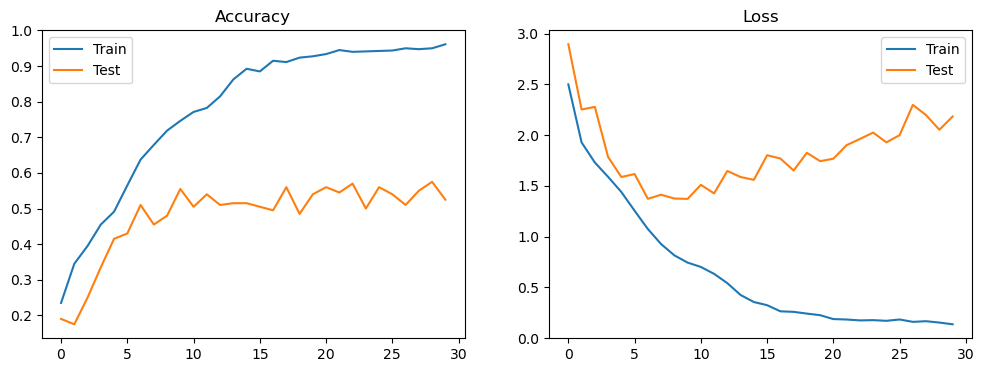

In [32]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.legend()

plt.show()


#### model is overfitting the training data — it learns training patterns very well, but doesn’t generalize to unseen test data.   So we will do regularization

In [34]:
from tensorflow.keras.regularizers import l2

Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=input_shape)


<Conv2D name=conv2d_12, built=False>

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [38]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=50, batch_size=32, callbacks=[early_stop])


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9728 - loss: 0.0913 - val_accuracy: 0.5550 - val_loss: 2.6411
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9789 - loss: 0.0539 - val_accuracy: 0.5250 - val_loss: 2.7492
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9868 - loss: 0.0565 - val_accuracy: 0.5400 - val_loss: 2.8750
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9825 - loss: 0.0524 - val_accuracy: 0.5500 - val_loss: 2.6255
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9934 - loss: 0.0319 - val_accuracy: 0.5450 - val_loss: 3.0419


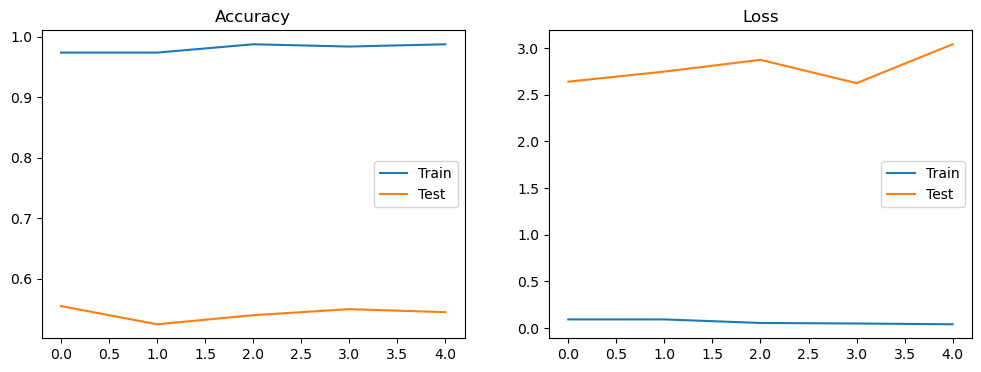

In [39]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.legend()

plt.show()


In [41]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Use correct number of classes
])


In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 11, 128, 16)         │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 5, 64, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 5, 64, 16)           │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 3, 62, 32)           │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 1, 31, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 1, 31, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 992)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │          63,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,194 (270.29 KB)

 Trainable params: 69,098 (269.91 KB)

 Non-trainable params: 96 (384.00 B)

In [43]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1783 - loss: 3.0721 - val_accuracy: 0.1550 - val_loss: 4.6182
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3583 - loss: 2.1066 - val_accuracy: 0.1550 - val_loss: 2.8817
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4134 - loss: 1.6876 - val_accuracy: 0.2450 - val_loss: 2.3748
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4575 - loss: 1.5424 - val_accuracy: 0.3150 - val_loss: 1.8986
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5229 - loss: 1.3986 - val_accuracy: 0.3850 - val_loss: 1.8707
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6216 - loss: 1.1567 - val_accuracy: 0.3450 - val_loss: 1.8066
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6427 - loss: 1.0232 - val_accuracy: 0.4400 - val_loss: 1.6330
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6424 - loss: 1.0274 - val_accuracy: 0.4450 - v

In [44]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


7/7 - 0s - 14ms/step - accuracy: 0.4900 - loss: 1.8743
Test Accuracy: 0.4900
Test Loss: 1.8743


In [46]:
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

def predict_genre(file_path, model, label_encoder, n_mfcc=13, max_len=130):
    SAMPLE_RATE = 22050
    DURATION = 30

    # Load audio file
    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)

    # Pad/truncate
    if mfccs.shape[1] < max_len:
        pad_width = max_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_len]

    # Reshape to match input shape of model: (1, height, width, 1)
    mfccs = mfccs[..., np.newaxis]
    mfccs = np.expand_dims(mfccs, axis=0)

    # Predict
    prediction = model.predict(mfccs)
    predicted_index = np.argmax(prediction)
    predicted_genre = label_encoder.inverse_transform([predicted_index])[0]

    print(f"🎵 Predicted Genre: {predicted_genre}")
    return predicted_genre


In [54]:
audio_path = r"C:\Users\krish\OneDrive\Desktop\Music Genre Classifier\Genre Classifier Dataset\genres\metal\metal.00007.au"

In [55]:
predict_genre(audio_path, model, label_encoder)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
🎵 Predicted Genre: metal


'metal'